<a href="https://colab.research.google.com/github/Taneyquezada/Estadistica/blob/main/eii_u2_p_22150442.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TECNOLÓGICO NACIONAL DE MÉXICO

INSTITUTO TECNOLÓGICO DE AGUASCALIENTES

INGENIERÍA EN GESTIÓN EMPRESARIAL

Estadística Inferencial II

Proyecto U2

Health & Lifestyle

Docente: José Cruz Muñoz Esparza

Alumna: Patricia Taney Quezada Zúñiga

No. de control: 22150442

07 de Abril de 2025

# **Health & Lifestyle**

# INTRODUCCIÓN

Para este proyecto lo que se busca es lograr el buen uso de una matriz de correlación para así poder encontrar las variables más correlacionadas, al igual que tener un buen entendimiento de los modelos de entrenamiento y prueba (train y test). Para ello, necesitaremos de los conocimientos aprendidos y aplicados en la unidad pasada, como lo es calcular el coeficiente de correlación y el uso de la tabla anova, agregando a eso la extracción de la ecuación de regresión múltiple y aplicándolo en la base de datos "Health & Lifestyle".

# MARCO TEÓRICO
Este análisis estadístico está cotejado de la base de datos siguiente:
https://raw.githubusercontent.com/Taneyquezada/Estadistica/refs/heads/main/health_activity_data.csv

El análisis estadístico es una herramienta fundamental para comprender y explicar fenómenos a partir de datos. En el contexto de la salud y la actividad física, permite detectar patrones y relaciones significativas entre variables como el consumo calórico, la actividad diaria, la frecuencia cardíaca, entre otras. Este estudio se enfoca en analizar las variables más relacionadas con el consumo calórico ("Calories_Intake"), mediante técnicas estadísticas como el análisis de correlación y la regresión múltiple.

En este análisis se utilizaron procedimientos para tener una primera aproximación a la distribución de variables como frecuencia cardíaca, niveles de estrés, calidad del sueño, entre otros.


# HIPÓTESIS

*Hipótesis nula (H₀)*: No existe una relación lineal significativa entre el consumo calórico diario (Calories_Intake) y las variables peso (Weight_kg) y horas de ejercicio por semana (Exercise_Hours_per_Week).

*Hipótesis alternativa (H₁)*: Al menos una de las variables independientes (Weight_kg o Exercise_Hours_per_Week) tiene un efecto significativo sobre el consumo calórico (Calories_Intake).

# METODOLOGÍA



***Matriz de calor***

El mapa de calor es una representación gráfica de la matriz de correlación, que permite visualizar las relaciones lineales entre variables numéricas. En este análisis, se utilizó para identificar aquellas variables que tienen una mayor asociación con la variable objetivo, "Calories_Intake". El coeficiente de correlación de Pearson se emplea para medir la fuerza y dirección de estas relaciones, con valores que van desde -1 (correlación negativa perfecta) hasta 1 (correlación positiva perfecta).

Se realizó una limpieza y transformación de los datos para asegurar su compatibilidad con los métodos estadísticos aplicados (por ejemplo, conversión de variables categóricas a numéricas). Después, se generó una matriz de correlación con el coeficiente de Pearson para examinar las relaciones lineales entre variables. Esta matriz fue visualizada a través de un mapa de calor (heatmap), que permitió identificar las variables numéricas con mayor correlación con la variable objetivo: “Calories_Intake”. Esto se aplicó a la columna categórica "Heart Desease".


***
***Modelos de entrenamiento y prueba***

Para realizar modelos predictivos confiables, es necesario dividir el conjunto de datos en dos partes:

Conjunto de entrenamiento, usado para construir el modelo.

Conjunto de prueba, usado para evaluar su desempeño.

Esta separación permite prevenir el sobreajuste y obtener un modelo que generalice correctamente.

Utilizando los datos del conjunto de entrenamiento, se aplicó un modelo de regresión lineal múltiple, tomando como variable dependiente a "Calories_Intake" y como variables independientes a aquellas con alta correlación identificadas en la matriz de calor. Para ello se calculó el coeficiente de correlación (R), así como el coeficiente de determinación (R²), los cuales indican la intensidad y proporción de la variabilidad explicada por el modelo.
Tomamos como variable dependiende X "Calories_Intake" y como variables independientes Y "Weight_kg" "Exercise_Hours_per_Week".

***
***ANOVA***

La tabla ANOVA (Análisis de Varianza) se utiliza para evaluar la significancia global del modelo de regresión. A través del valor p (p-value), se puede determinar si existe una relación estadísticamente significativa entre el conjunto de variables independientes y la variable dependiente. Si el valor p es menor a un umbral típico (como 0.05), se concluye que el modelo es significativo.

Para validar la significancia estadística del modelo de regresión, se elaboró una tabla ANOVA, la cual permite determinar si el conjunto de variables independientes tiene un efecto significativo sobre la variable dependiente. El análisis se centró principalmente en el valor p del modelo, con un umbral de significancia del 5% (α = 0.05). Si el valor p fue menor, se concluye que el modelo es significativo.
***
***Ecuación de regresión***

A partir del modelo entrenado, se obtiene una ecuación de regresión múltiple que representa la relación matemática entre las variables. Esta ecuación puede ser utilizada para realizar predicciones de "Calories_Intake" a partir de nuevos valores de las variables independientes.

^
 =β
0
​
 +β
1
​
 X
1
​
 +β
2
​
 X
2
​
 +⋯+β
n
​
 X
n
​

Donde:

𝑌
^
Y
^
  es el valor estimado de "Calories_Intake".

𝛽
0
β
0
​
  es el intercepto.

𝛽
1
,
𝛽
2
,
.
.
.
,
𝛽
𝑛
β
1
​
 ,β
2
​
 ,...,β
n
​
  son los coeficientes de regresión.

𝑋
1
,
𝑋
2
,
.
.
.
,
𝑋
𝑛
X
1
​
 ,X
2
​
 ,...,X
n
​
  son las variables predictoras seleccionadas.

In [66]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Taneyquezada/Estadistica/refs/heads/main/health_activity_data.csv")
df.dropna(inplace=True)

df.drop(columns = ['ID'], inplace = True)

df

,Age,Gender,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease
0,56,Male,164,81,30.72,5134,1796,8.6,102,137/72,8.1,No,7,No,No
1,69,Male,156,82,20.86,12803,1650,4.5,103,129/65,3.7,No,7,No,No
2,46,Female,158,65,30.93,16408,1756,4.3,74,127/68,3.2,Yes,0,No,No
3,32,Male,197,87,31.19,18420,2359,4.1,116,125/86,8.5,No,5,No,No
4,60,Male,157,63,29.37,17351,2556,5.1,111,100/64,8.5,Yes,8,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18,Male,179,116,31.67,10095,2667,4.6,79,108/63,6.3,No,5,No,No
996,35,Female,170,114,23.88,11361,2351,7.2,54,98/75,2.9,No,3,No,Yes
997,49,Female,169,85,23.44,9531,2416,4.5,80,125/65,7.6,No,4,No,No
998,64,Male,155,74,22.34,5270,2080,5.8,101,129/86,5.4,No,4,No,No


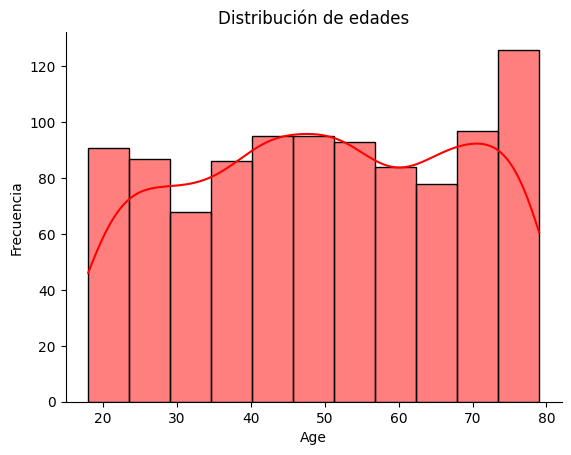

In [67]:
#Age
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Age"], kde = True, color = "red")

plt.xlabel("Age")
plt.ylabel("Frecuencia")
plt.title("Distribución de edades")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

In [68]:
#Gender
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols("Calories_Intake	 ~ C(Gender)", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,1.419671e+05,141967.099657,0.327827,0.567071
Residual,998.0,4.321892e+08,433055.294801,NaN,NaN


In [69]:
df.drop(columns = ['Gender'], inplace = True)

df

,Age,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease
0,56,164,81,30.72,5134,1796,8.6,102,137/72,8.1,No,7,No,No
1,69,156,82,20.86,12803,1650,4.5,103,129/65,3.7,No,7,No,No
2,46,158,65,30.93,16408,1756,4.3,74,127/68,3.2,Yes,0,No,No
3,32,197,87,31.19,18420,2359,4.1,116,125/86,8.5,No,5,No,No
4,60,157,63,29.37,17351,2556,5.1,111,100/64,8.5,Yes,8,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18,179,116,31.67,10095,2667,4.6,79,108/63,6.3,No,5,No,No
996,35,170,114,23.88,11361,2351,7.2,54,98/75,2.9,No,3,No,Yes
997,49,169,85,23.44,9531,2416,4.5,80,125/65,7.6,No,4,No,No
998,64,155,74,22.34,5270,2080,5.8,101,129/86,5.4,No,4,No,No


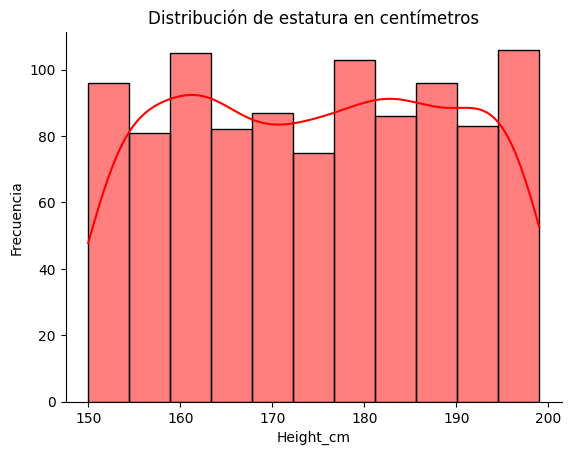

In [70]:
#Height_cm
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Height_cm"], kde = True, color = "red")

plt.xlabel("Height_cm")
plt.ylabel("Frecuencia")
plt.title("Distribución de estatura en centímetros")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

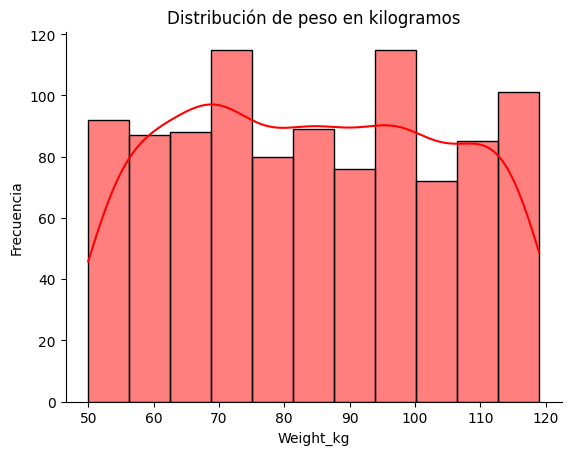

In [71]:
#Weight_kg
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Weight_kg"], kde = True, color = "red")

plt.xlabel("Weight_kg")
plt.ylabel("Frecuencia")
plt.title("Distribución de peso en kilogramos")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

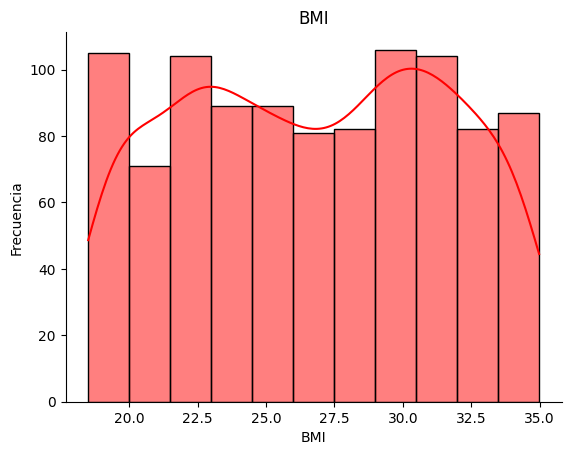

In [72]:
#BMI
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["BMI"], kde = True, color = "red")

plt.xlabel("BMI")
plt.ylabel("Frecuencia")
plt.title("BMI")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

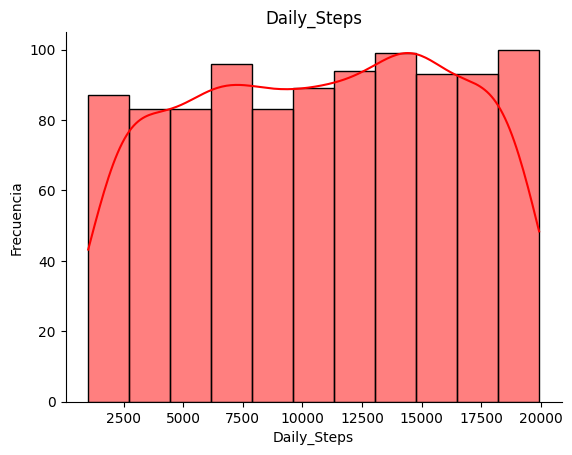

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Daily_Steps"], kde = True, color = "red")

plt.xlabel("Daily_Steps")
plt.ylabel("Frecuencia")
plt.title("Daily_Steps")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

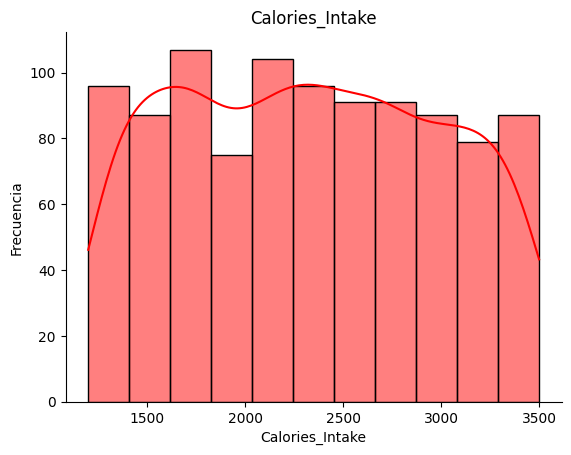

In [74]:
#Calories_Intake
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Calories_Intake"], kde = True, color = "red")

plt.xlabel("Calories_Intake")
plt.ylabel("Frecuencia")
plt.title("Calories_Intake")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

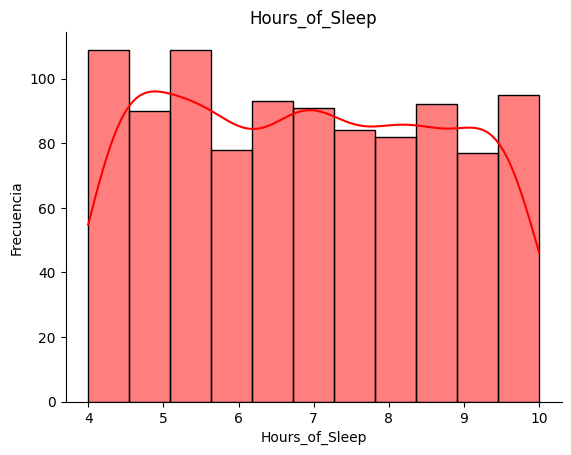

In [75]:
#Hours_of_Sleep
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Hours_of_Sleep"], kde = True, color = "red")

plt.xlabel("Hours_of_Sleep")
plt.ylabel("Frecuencia")
plt.title("Hours_of_Sleep")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

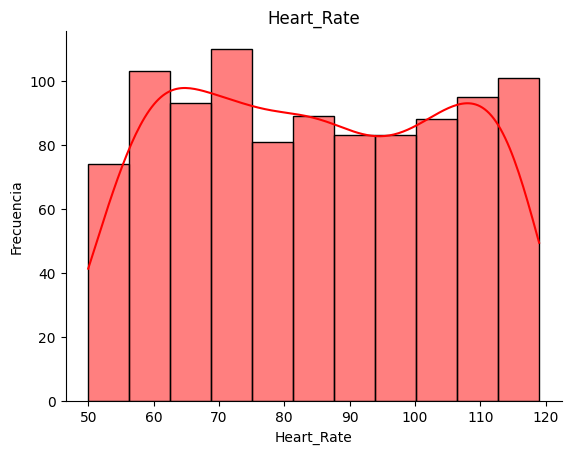

In [76]:
#Heart_Rate
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Heart_Rate"], kde = True, color = "red")

plt.xlabel("Heart_Rate")
plt.ylabel("Frecuencia")
plt.title("Heart_Rate")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

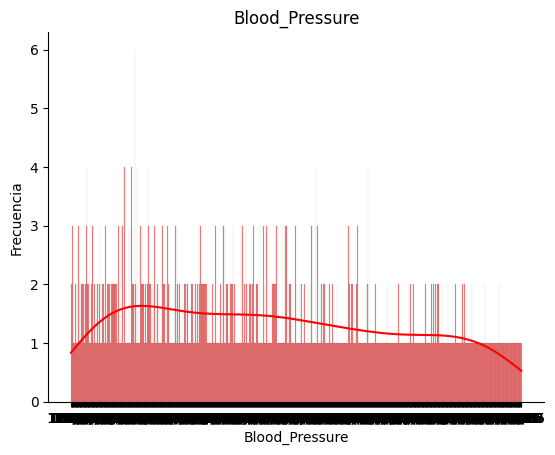

In [77]:
#Blood_Pressure
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Blood_Pressure"], kde = True, color = "red")

plt.xlabel("Blood_Pressure")
plt.ylabel("Frecuencia")
plt.title("Blood_Pressure")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)


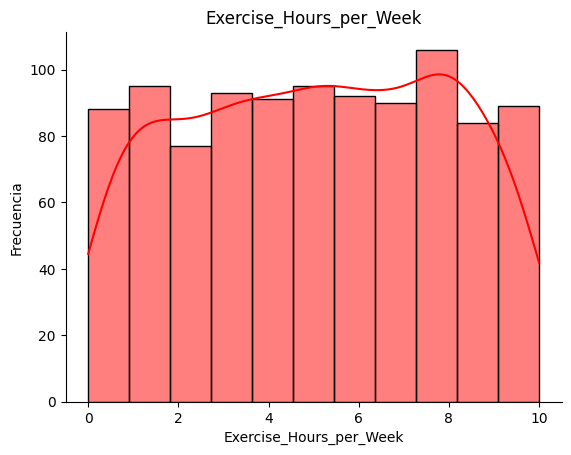

In [78]:
#Exercise_Hours_per_Week
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Exercise_Hours_per_Week"], kde = True, color = "red")

plt.xlabel("Exercise_Hours_per_Week")
plt.ylabel("Frecuencia")
plt.title("Exercise_Hours_per_Week")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

In [79]:
#Smoker
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols("Calories_Intake ~ C(Smoker)", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Smoker),1.0,1.751059e+05,175105.934755,0.404381,0.524981
Residual,998.0,4.321560e+08,433022.089555,NaN,NaN


In [80]:
df.drop(columns = ['Smoker'], inplace = True)

df

,Age,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease
0,56,164,81,30.72,5134,1796,8.6,102,137/72,8.1,7,No,No
1,69,156,82,20.86,12803,1650,4.5,103,129/65,3.7,7,No,No
2,46,158,65,30.93,16408,1756,4.3,74,127/68,3.2,0,No,No
3,32,197,87,31.19,18420,2359,4.1,116,125/86,8.5,5,No,No
4,60,157,63,29.37,17351,2556,5.1,111,100/64,8.5,8,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18,179,116,31.67,10095,2667,4.6,79,108/63,6.3,5,No,No
996,35,170,114,23.88,11361,2351,7.2,54,98/75,2.9,3,No,Yes
997,49,169,85,23.44,9531,2416,4.5,80,125/65,7.6,4,No,No
998,64,155,74,22.34,5270,2080,5.8,101,129/86,5.4,4,No,No


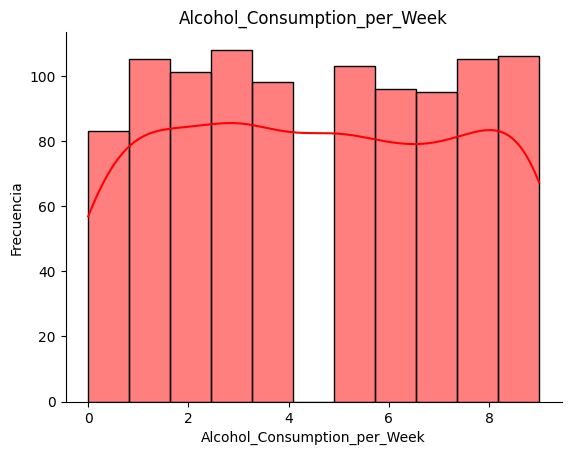

In [81]:
#Alcohol_Consumption_per_Week
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Alcohol_Consumption_per_Week"], kde = True, color = "red")

plt.xlabel("Alcohol_Consumption_per_Week")
plt.ylabel("Frecuencia")
plt.title("Alcohol_Consumption_per_Week")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

In [82]:
#Diabetic
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols("Calories_Intake ~ C(Diabetic)", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Diabetic),1.0,6.777747e+05,677774.690424,1.567042,0.21093
Residual,998.0,4.316534e+08,432518.413447,NaN,NaN


In [83]:
df.drop(columns = ['Diabetic'], inplace = True)

df

,Age,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Alcohol_Consumption_per_Week,Heart_Disease
0,56,164,81,30.72,5134,1796,8.6,102,137/72,8.1,7,No
1,69,156,82,20.86,12803,1650,4.5,103,129/65,3.7,7,No
2,46,158,65,30.93,16408,1756,4.3,74,127/68,3.2,0,No
3,32,197,87,31.19,18420,2359,4.1,116,125/86,8.5,5,No
4,60,157,63,29.37,17351,2556,5.1,111,100/64,8.5,8,No
...,...,...,...,...,...,...,...,...,...,...,...,...
995,18,179,116,31.67,10095,2667,4.6,79,108/63,6.3,5,No
996,35,170,114,23.88,11361,2351,7.2,54,98/75,2.9,3,Yes
997,49,169,85,23.44,9531,2416,4.5,80,125/65,7.6,4,No
998,64,155,74,22.34,5270,2080,5.8,101,129/86,5.4,4,No


In [84]:
#Heart_Disease
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols("Calories_Intake ~ C(Heart_Disease)", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo) #ANOVA de una vía
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Heart_Disease),1.0,1.415216e+06,1.415216e+06,3.277636,0.070531
Residual,998.0,4.309159e+08,4.317795e+05,NaN,NaN


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2  meandiff p-adj    lower    upper  reject
-------------------------------------------------------
    No    Yes -129.5288 0.0705 -269.9268 10.8693  False
-------------------------------------------------------


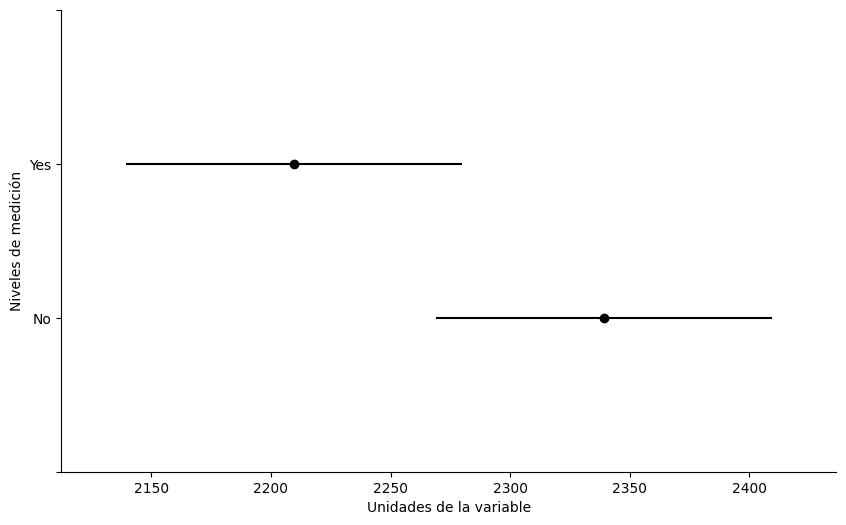

In [85]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Calories_Intake'], groups = df['Heart_Disease'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [86]:
df['Heart_Disease'] = df['Heart_Disease'].replace({'Sí': 1, 'No': 0})
df

,Age,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Alcohol_Consumption_per_Week,Heart_Disease
0,56,164,81,30.72,5134,1796,8.6,102,137/72,8.1,7,0
1,69,156,82,20.86,12803,1650,4.5,103,129/65,3.7,7,0
2,46,158,65,30.93,16408,1756,4.3,74,127/68,3.2,0,0
3,32,197,87,31.19,18420,2359,4.1,116,125/86,8.5,5,0
4,60,157,63,29.37,17351,2556,5.1,111,100/64,8.5,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,18,179,116,31.67,10095,2667,4.6,79,108/63,6.3,5,0
996,35,170,114,23.88,11361,2351,7.2,54,98/75,2.9,3,Yes
997,49,169,85,23.44,9531,2416,4.5,80,125/65,7.6,4,0
998,64,155,74,22.34,5270,2080,5.8,101,129/86,5.4,4,0


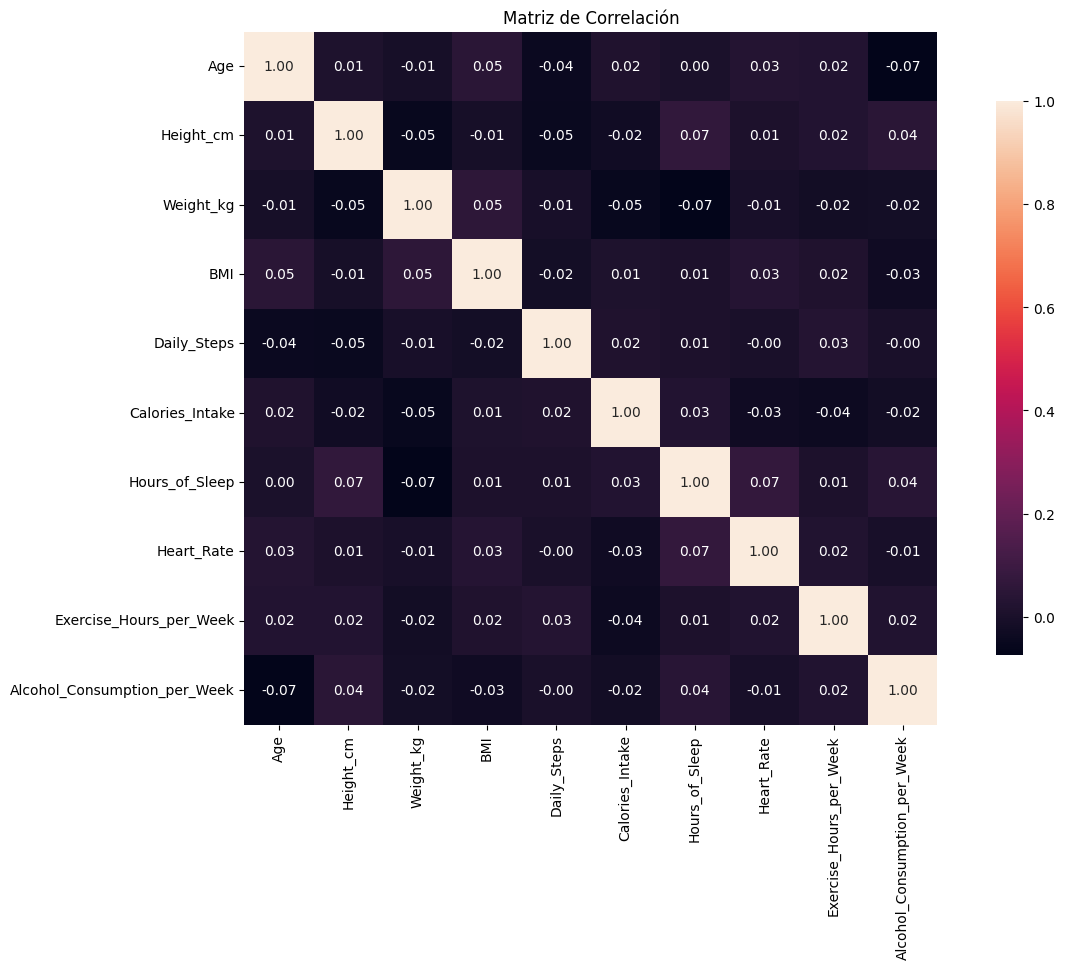

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("https://raw.githubusercontent.com/Taneyquezada/Estadistica/refs/heads/main/health_activity_data.csv")
df.dropna(inplace=True)
df.drop(columns = ['ID'], inplace = True)

# Calcular la matriz de correlación
matriz_de_correlación = df.corr(numeric_only=True)

# Graficar el heatmap
plt.figure(figsize = (15,9))
sns.heatmap(matriz_de_correlación, annot = True, fmt = ".2f", square= True, cbar_kws = {'shrink': 0.8})
plt.title('Matriz de Correlación')
plt.show()

Coeficiente de determinación: -0.0182




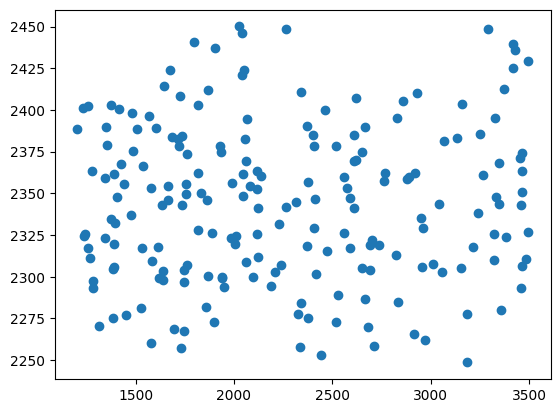

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm

X = df[['Weight_kg',"Exercise_Hours_per_Week"]]
Y = df['Calories_Intake']

X_train, X_test,  Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_constante).fit()

Yc = modelo.predict(X_test_constante)

plt.scatter(Y_test,Yc)

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de determinación: {r2: 0.4f}')
print("\n")


In [91]:
b0,b1,b2 = modelo.params
fun = lambda x1,x2: b0 + b1 * x1 + b2 * x2
fun(114, 5.4)

2301.069646797753

In [93]:
from statsmodels.formula.api import ols
modelo_2 = ols('Calories_Intake ~ Weight_kg+Exercise_Hours_per_Week', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_2, typ = 2)
tabla_anova

,sum_sq,df,F,PR(>F)
Weight_kg,1.101808e+06,1.0,2.550938,0.110546
Exercise_Hours_per_Week,6.346552e+05,1.0,1.469372,0.225732
Residual,4.306271e+08,997.0,NaN,NaN


# RESULTADO

Gender se elimina ya que no aporta información según ANOVA.

Smoker se elimina ya que no aporta información según ANOVA.

Diabetic se elimina ya que no aporta información según ANOVA.

Heart_Disease lo tomamos, sin importar que el valor no sea menor a 0.05 según ANOVA, para tener un valor categórico con el qué trtabajar, al final sigue sin ser relevante como se puede apreciar en la matriz de calor.

Tomamos como variable dependiende X "Calories_Intake" y como variables independientes Y "Weight_kg" "Exercise_Hours_per_Week". Tomamos esas variables Y ya que son las que más se acercan a 0.1 o -0.1, al ser -0.05 y  -0.04 respectivamente, que si bien no llegan a tener un valor cercano, son con los que mejor se podría trabajar para continuar con los modelos de train y test.
***
El análisis muestra que no existe evidencia estadísticamente significativa de que el peso corporal o las horas de ejercicio semanal tengan un efecto lineal importante en la cantidad de calorías ingeridas por los individuos en este conjunto de datos.

El coeficiente de determinación obtenido fue de: R
2= −0.0182
Un R² negativo indica que el modelo tiene peor desempeño que una línea horizontal (modelo sin regresores).

Es decir, el modelo no explica la variabilidad del consumo calórico. De hecho, introduce más error que simplemente predecir el promedio.

Esto implica una muy baja o nula capacidad predictiva usando solo las variables Weight_kg y Exercise_Hours_per_Week.

Los valores p para ambas variables son mayores a 0.05, lo que indica que ninguna de las dos es estadísticamente significativa para predecir Calories_Intake con un 95% de confianza.

Por tanto, **no se rechaza la hipótesis nula**:

Las variables Weight_kg y Exercise_Hours_per_Week no tienen efecto significativo sobre el consumo calórico.



# CONCLUSIÓN

Se aplicó un análisis mediante un mapa de calor, el cual permitió observar la correlación entre las variables y orientar la selección de predictores. Después se construyó un modelo de regresión lineal múltiple tomando como variables independientes Weight_kg y Exercise_Hours_per_Week, y se evaluó su capacidad para predecir el consumo calórico.

Sin embargo, los resultados indicaron que el modelo no fue adecuado para explicar la variabilidad en Calories_Intake, reflejado en un coeficiente de determinación (R²) negativo (-0.0182). Al igua, la tabla ANOVA mostró que ninguna de las variables independientes fue estadísticamente significativa (valores p > 0.05), lo cual llevó a no rechazar la hipótesis nula.

Esto sugiere que, al menos dentro de este conjunto de datos, el consumo calórico diario no está significativamente influenciado por el peso corporal ni por las horas de ejercicio semanal de manera lineal. Es probable que otras variables (como edad, metabolismo, etc.) jueguen un papel más determinante.

Se concluye que es necesario ampliar el análisis incluyendo otras variables o empleando modelos no lineales más complejos para obtener mejores resultados predictivos sobre el consumo calórico.